# SALES PREDICTION

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

In [2]:
# Introduction to Machine Learning - Session 5

#### Importing data and libaries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r"Advertising.csv", index_col=0, header=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Data stats and info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Visualising the data

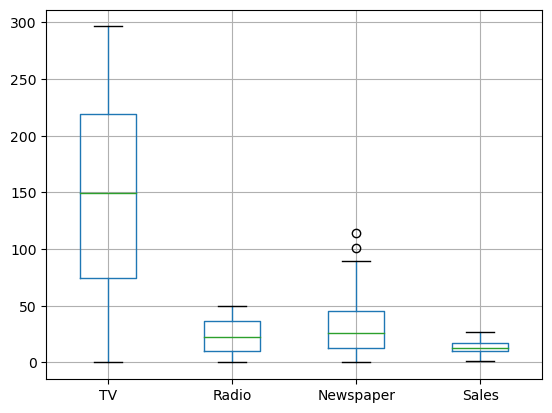

In [7]:
data.boxplot();

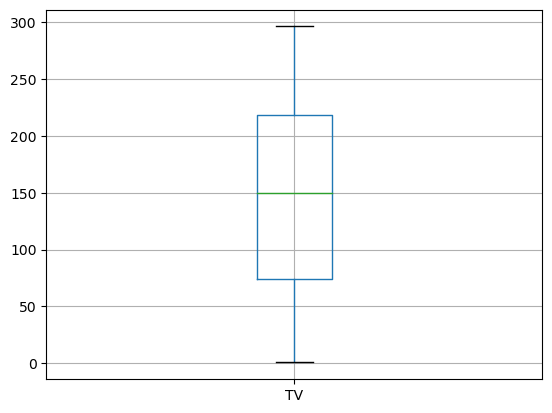

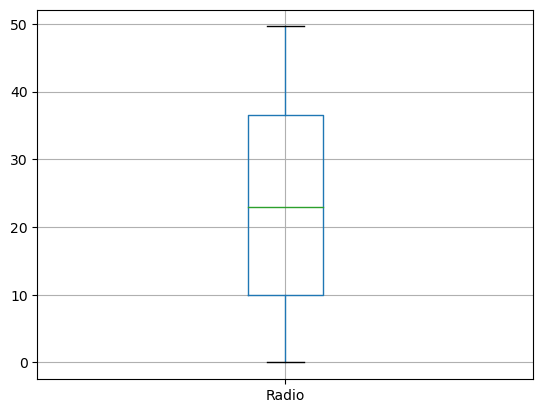

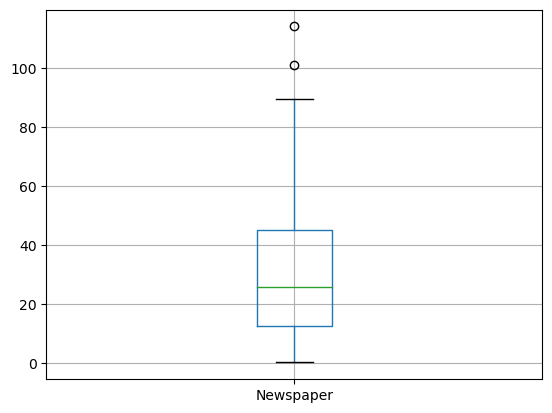

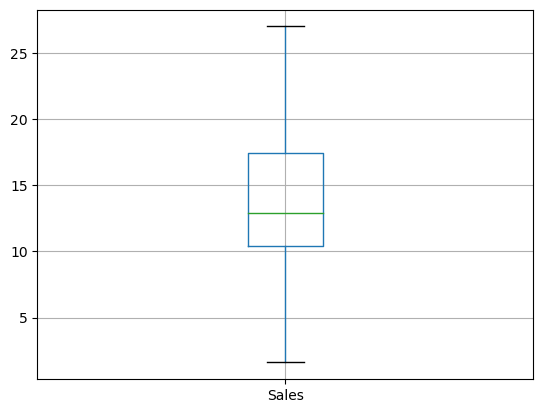

In [8]:
#Since the data is too small in respect to TV it won't be legible hence we will seperate it out.

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [9]:
data.shape

(200, 4)

In [10]:
# Droping outliers

data.drop(data[data["Newspaper"]>=90].index, axis = 0, inplace=True)

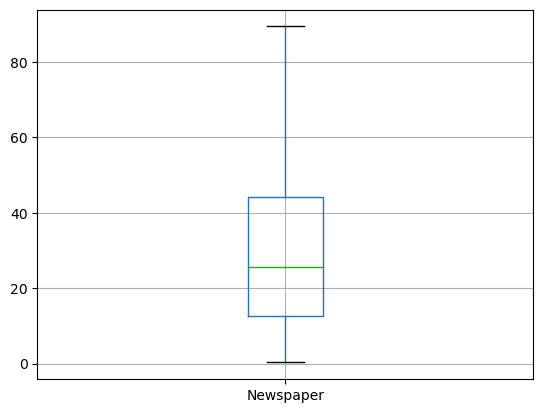

(198, 4)


In [11]:
data.boxplot(column='Newspaper', return_type='axes')
plt.show()
data.shape
print(data.shape)

#### Creating X and Y

In [12]:
data.head(1)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1


In [13]:
X = data.loc[:,["TV","Radio","Newspaper"]]
Y = data.loc[:,"Sales"]

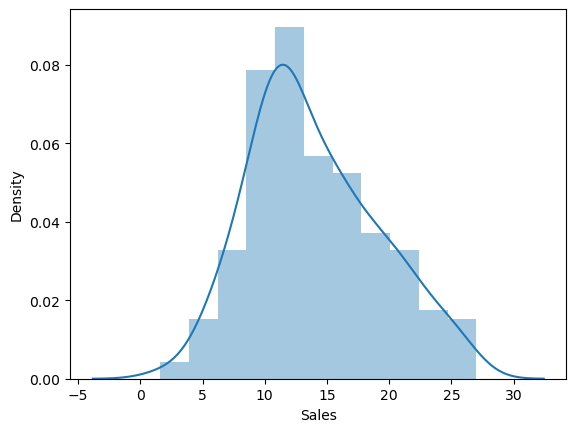

In [14]:
sns.distplot(Y)
plt.show()

#### Spliting the data

In [15]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)

#### Creating the model

In [16]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#Train the model object
lm.fit(X_train,Y_train)

LinearRegression()

#### Checking the performance

In [17]:
lm.score(X_train, Y_train)
#score=r2_score(Y_train,Y_pred)

0.9234109258384534

In [18]:
Y_pred=lm.predict(X_test)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7847276428213539
RMSE: 2.544064793385902
Adj R-square: 0.7813986888443645


#### Predicting sales using the model

In [20]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [22]:
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
0,53.5,2.0,21.4,8.1,5.811962
1,8.7,48.9,75.0,7.2,13.157775
2,237.4,5.1,23.5,12.5,14.559991
3,149.7,35.6,6.0,17.3,16.697822
4,182.6,46.2,58.7,21.2,20.299030
5,218.4,27.7,53.4,18.0,18.218051
6,188.4,18.1,25.6,14.9,14.966317
7,7.3,28.1,41.4,5.5,8.950087
8,199.1,30.6,38.7,18.3,17.924297
9,17.2,45.9,69.3,9.3,12.934932
